In [1]:
from keras import models
from keras import layers

# 二分类

Using TensorFlow backend.


In [2]:
model  = models.Sequential()
#卷积层，参数意义分别为：
#经过这一层之后，特征图的个数，一个卷积核，产生一个特征图，第一层：32，说明有32个卷积核；第二层64，说明在第一层的特征图基础上，每张特征图有两个卷积核进行特征采集
#卷积核大小
#激活函数
#输入大小（只在开始的第一层有，后面不需要）
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(400,100,3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [3]:
#配置模型的损失函数、优化器、指标名称
from keras import optimizers

model.compile(loss='binary_crossentropy',          #损失函数
optimizer=optimizers.RMSprop(lr=1e-4),             #优化器
metrics=['acc'])                                   #指标名称


In [4]:
#图片的训练路径和验证路径
train_dir = r'G:\useful_L\Normal2\NEW_NET_2.0\train'
validation_dir = r'G:\useful_L\Normal2\NEW_NET_2.0\val'


In [5]:
#生成训练需要的图片和标签
from keras.preprocessing.image import ImageDataGenerator
#将图片大小调整到1以内，原先图片每个像素的格式为uint8，所以要除以255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

#根据目录的名称，生成对应的标签
#train_dir有Ⅱ型和Ⅲ型的图片
#每次生成batch_size数量的图片，图片大小为target_size
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(400, 100),              #生成图片的大小
batch_size=20,                       #一次生成图片的数量
class_mode='binary')                 #图片标签的类型

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(400, 100),              #生成图片的大小
batch_size=10,                       #一次生成图片的数量
class_mode='binary')                 #图片标签的类型


Found 3480 images belonging to 2 classes.
Found 1460 images belonging to 2 classes.


In [6]:
# 训练时保留验证精度最高的模型

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='实验1.1_best.h5',monitor='val_acc',mode='auto' ,save_best_only='True')

history = model.fit_generator(
train_generator,                           #通过生成器传入图片和标签
steps_per_epoch=87*2,                      #分87*2次传入，每次20张
epochs=50,                                 #总共训练40轮
validation_data=validation_generator,      #通过生成器传入图片和标签进行验证
validation_steps=74*2,                     #分74*2次传入，每次10张
callbacks = [checkpoint]                   # 保留最好的模型
)

Epoch 1/50
174/174 [==============================] - 44s 254ms/step - loss: 0.3251 - acc: 0.8759 - val_loss: 0.1633 - val_acc: 0.9385 - ETA: 5:40 - loss: 0.6857 - acc: 0.5833

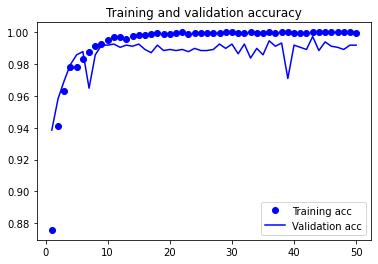

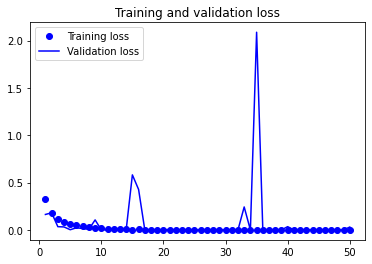

In [7]:
#绘制训练精度、验证精度
#绘制训练损失、验证损失
#python画图库，类似matlab的plot
import matplotlib.pyplot as plt
acc = history.history['acc']             #得到训练的指标数据
val_acc = history.history['val_acc']     #得到验证的指标数据
loss = history.history['loss']           #得到训练损失
val_loss = history.history['val_loss']   #得到验证损失
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.savefig('实验1.1_accuracy_50.png')
plt.legend()                              #画图例
plt.figure()                              #另一张图
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.savefig('实验1.1_loss_50.png')
plt.legend()
plt.show()                                #画图，最后加上

In [8]:
# 保存每轮的精度和损失

file = open('实验1.1_acc_loss_50.txt','w')
file.write('训练精度：')
for i in acc :
    file.write(str(i))
    file.write(" ")
file.write("\n")
file.write('验证精度：')
for i in val_acc :
    file.write(str(i))
    file.write(" ")


file.write("\n")
file.write('训练损失：')
for i in loss :
    file.write(str(i))
    file.write(" ")

file.write("\n")
file.write('验证损失：')
for i in val_loss :
    file.write(str(i))
    file.write(" ")

file.close()

In [1]:
import os
import numpy as np

B_dir = r'G:\useful_L\Normal2\NEW_NET_2.0\val\B'
N_dir = r'G:\useful_L\Normal2\NEW_NET_2.0\val\N'


from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
best_model = load_model('实验1.1_best.h5')


def my_image(path):
    out = []
    filenames = os.listdir(path)
    for filename in filenames:
        image = load_img(os.path.join(path, filename), target_size= (400,100))
        image = img_to_array(image)
        image = image/255.0
        out.append(image)
    return np.array(out)

imgs_B = my_image(B_dir)
imgs_N = my_image(N_dir)


ret_B = best_model.predict_classes(imgs_B)
ret_N = best_model.predict_classes(imgs_N)


ret_B = ret_B.tolist()
ret_N = ret_N.tolist()

B_B = ret_B.count([0])
B_N = ret_B.count([1])


N_B = ret_N.count([0])
N_N = ret_N.count([1])

TPR = B_B/len(ret_B)
FPR = N_B/len(ret_N)


print("len ret_B is {:d} ".format(len(ret_B)))
print("len ret_N is {:d} ".format(len(ret_N)))
print("________________________________")
print("B_B is {:d}".format(B_B))
print("B_N is {:d}".format(B_N))
print("________________________________")
print("N_B is {:d}".format(N_B))
print("N_N is {:d}".format(N_N))

print('TPR IS : {:f}'.format(TPR))
print('FPR IS : {:f}'.format(FPR))







Using TensorFlow backend.


len ret_B is 730 
len ret_N is 730 
________________________________
III_III is 725
III_N is 5
________________________________
N_III is 5
N_N is 725
TPR IS : 0.993151
FPR IS : 0.006849
